Step 1: Import Libraries

In [7]:
# Importing the pandas library to handle data in DataFrame format
import pandas as pd

# Importing the train_test_split function to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Importing RandomForestClassifier for building the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Importing XGBClassifier for building the XGBoost model
from xgboost import XGBClassifier

# Importing accuracy_score and classification_report to evaluate model performance
from sklearn.metrics import accuracy_score, classification_report

Step 2: Load the Dataset

In [10]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv("diabetes.csv")  

# Display the first 5 rows of the dataset to verify it loaded correctly
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Step 3: Data Visualization and Plots

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visuals
sns.set(style="whitegrid")

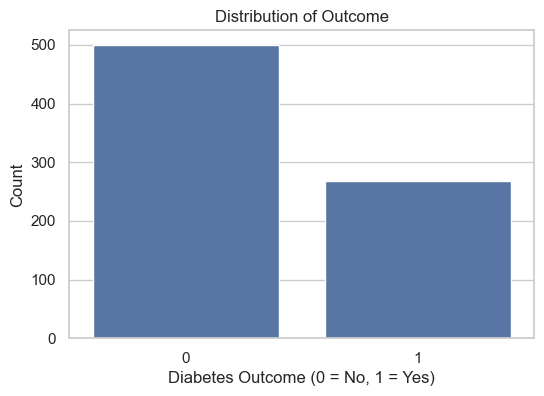

In [12]:
# Plot the distribution of the target variable (Outcome)
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

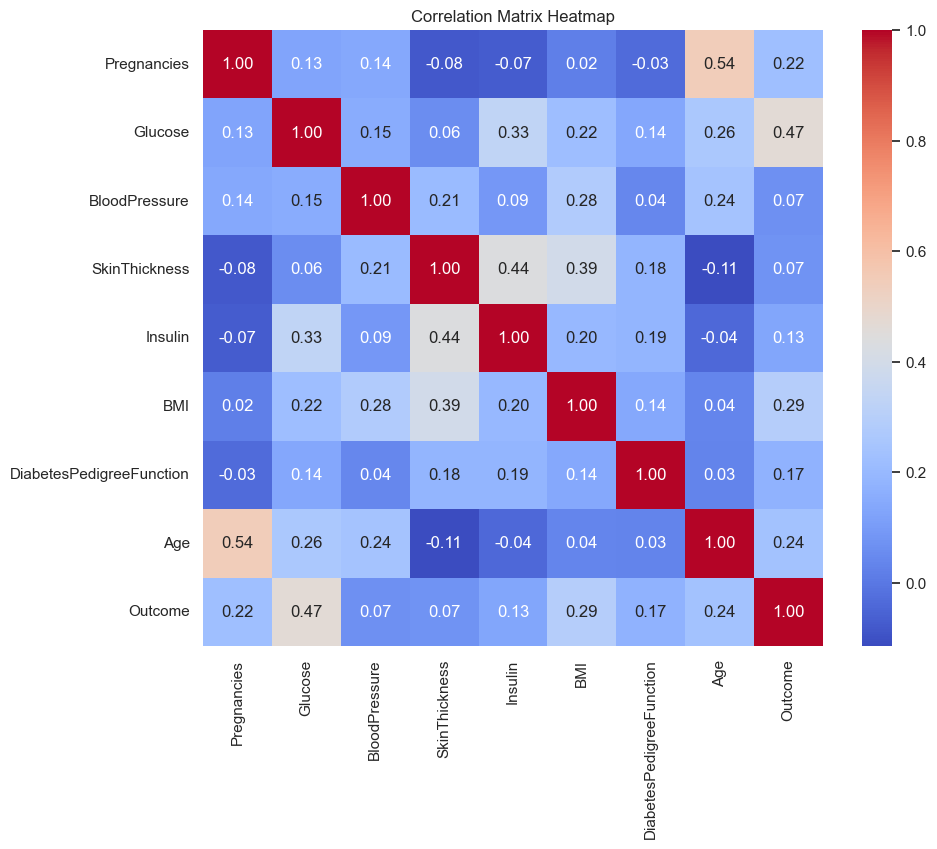

In [13]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

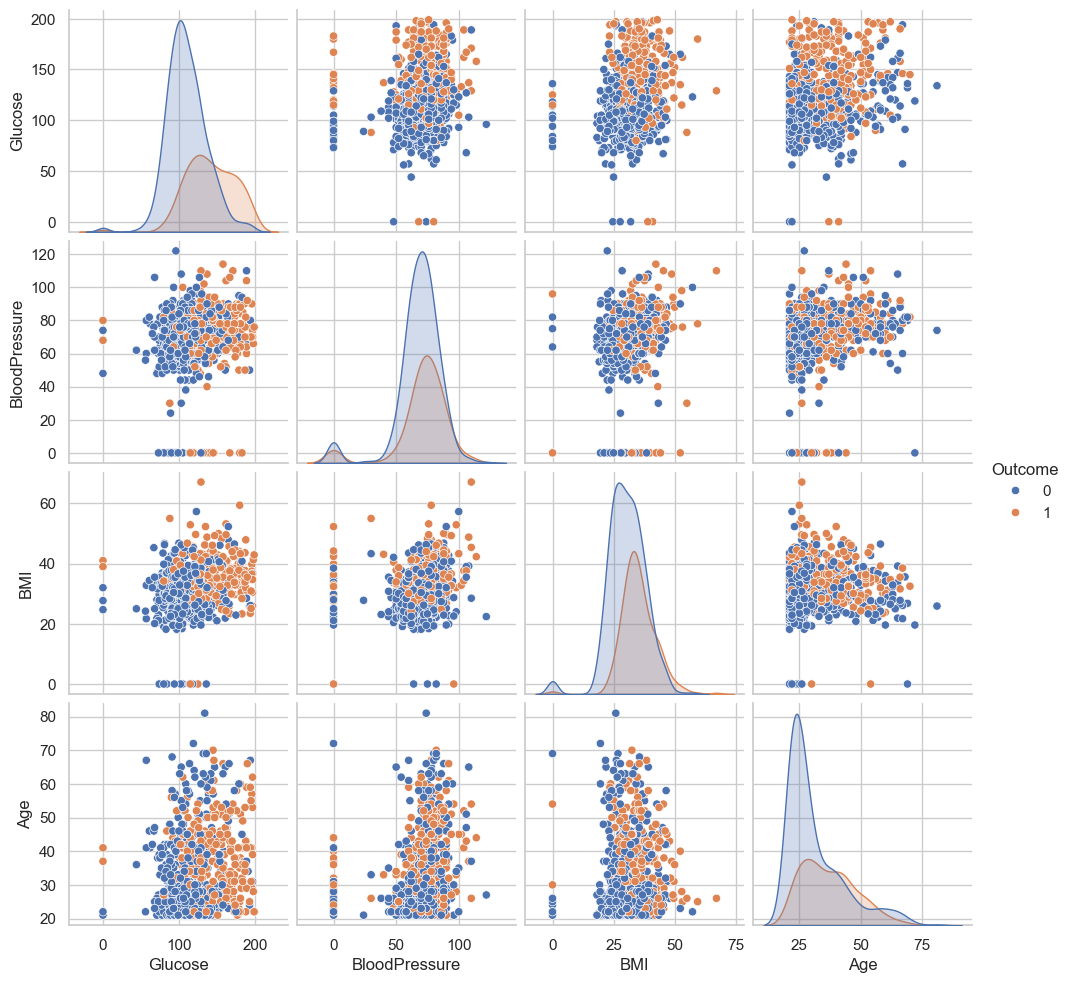

In [14]:
# Pairplot for selected features to visualize relationships
selected_features = ['Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome']
sns.pairplot(df[selected_features], hue='Outcome')
plt.show()

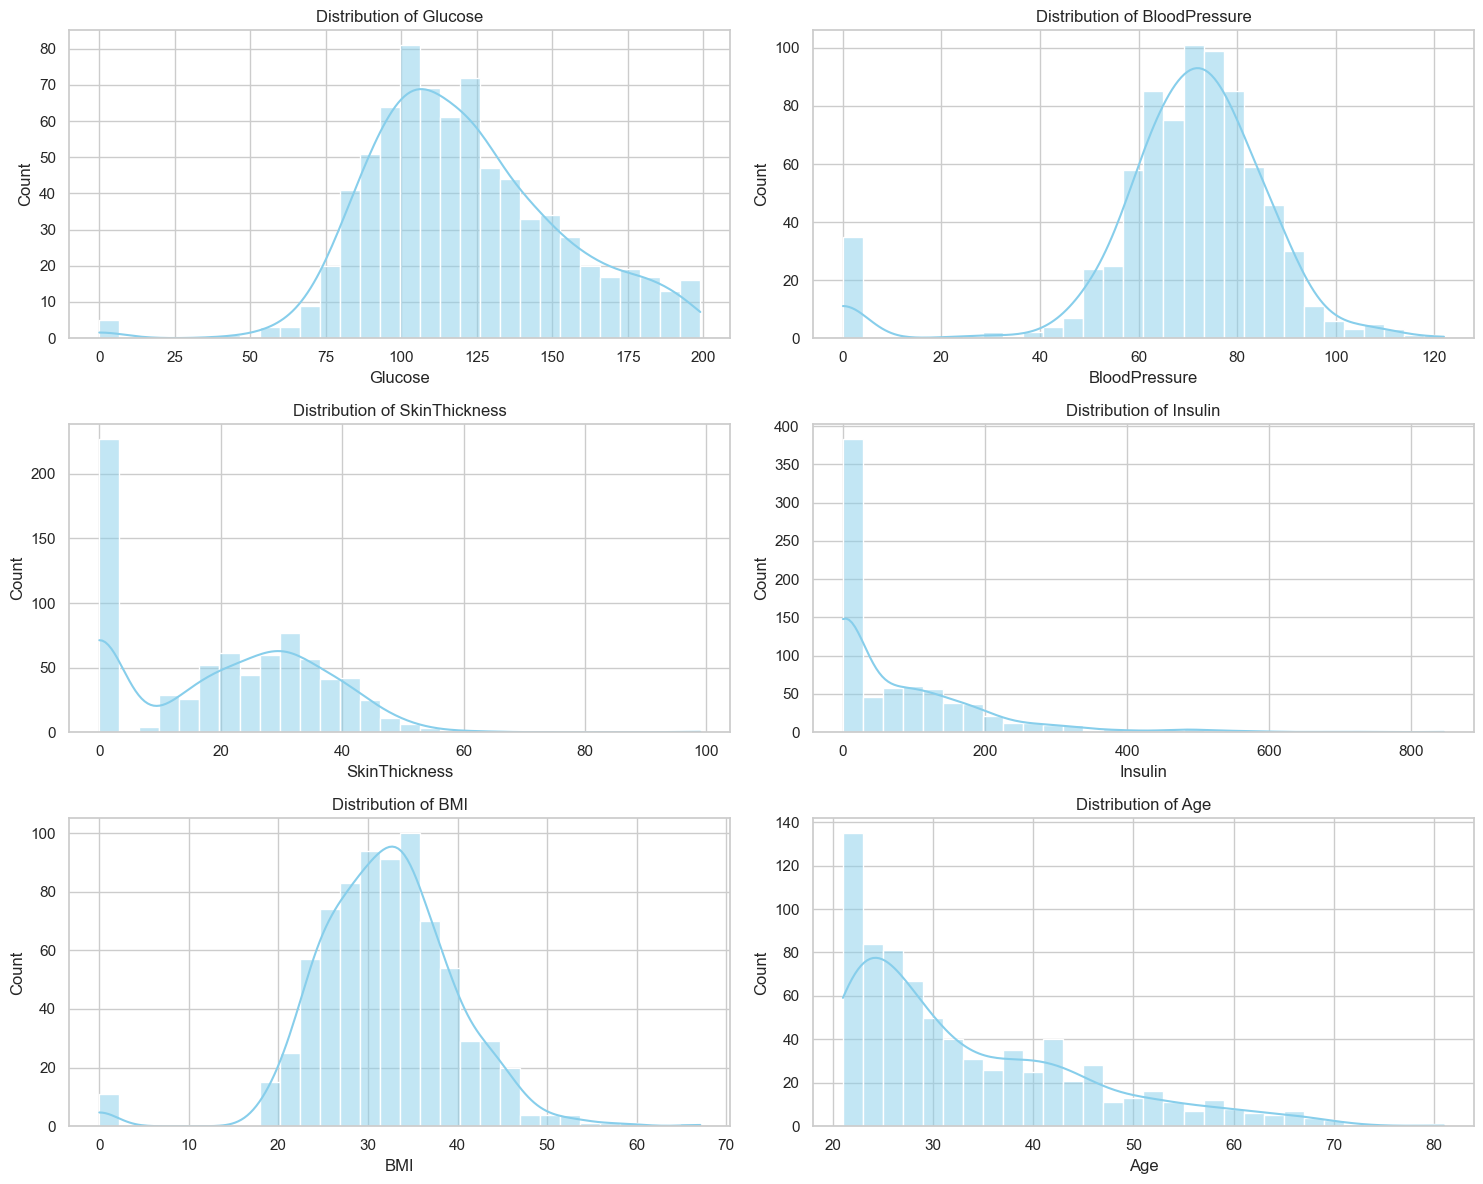

In [15]:
# Plot distributions for selected numeric features
selected_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[feature], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


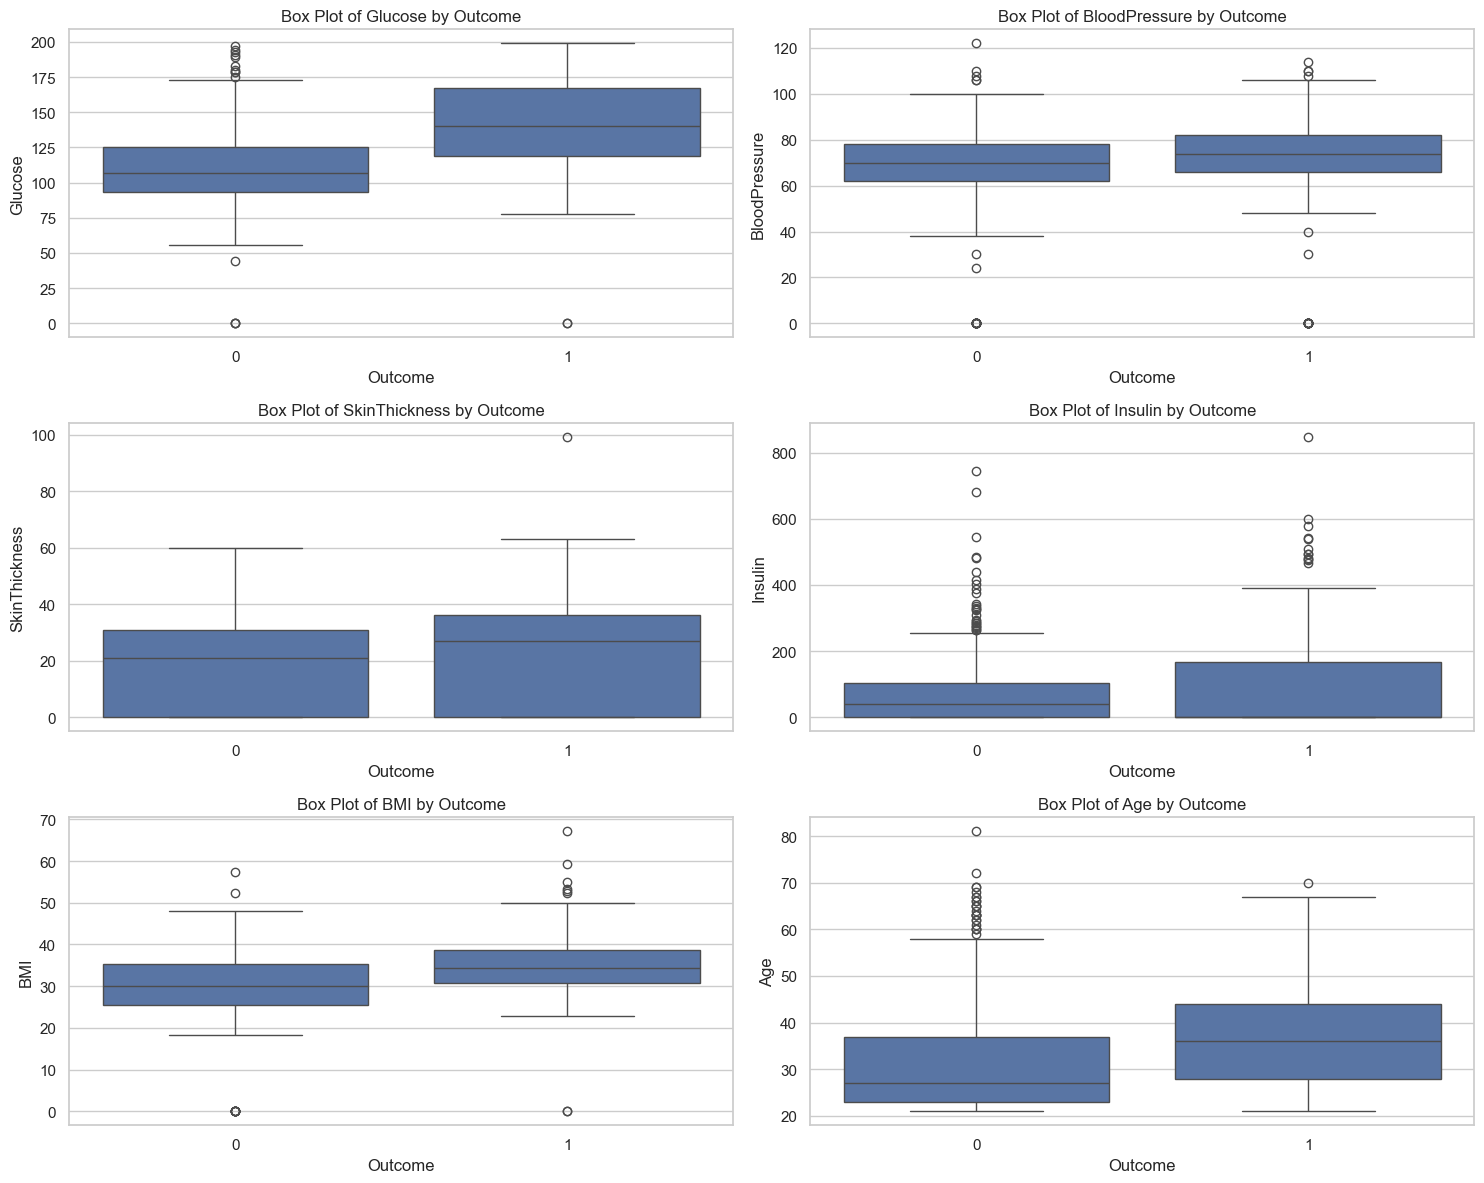

In [16]:
plt.figure(figsize=(15, 12))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Outcome')
    plt.xlabel('Outcome')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


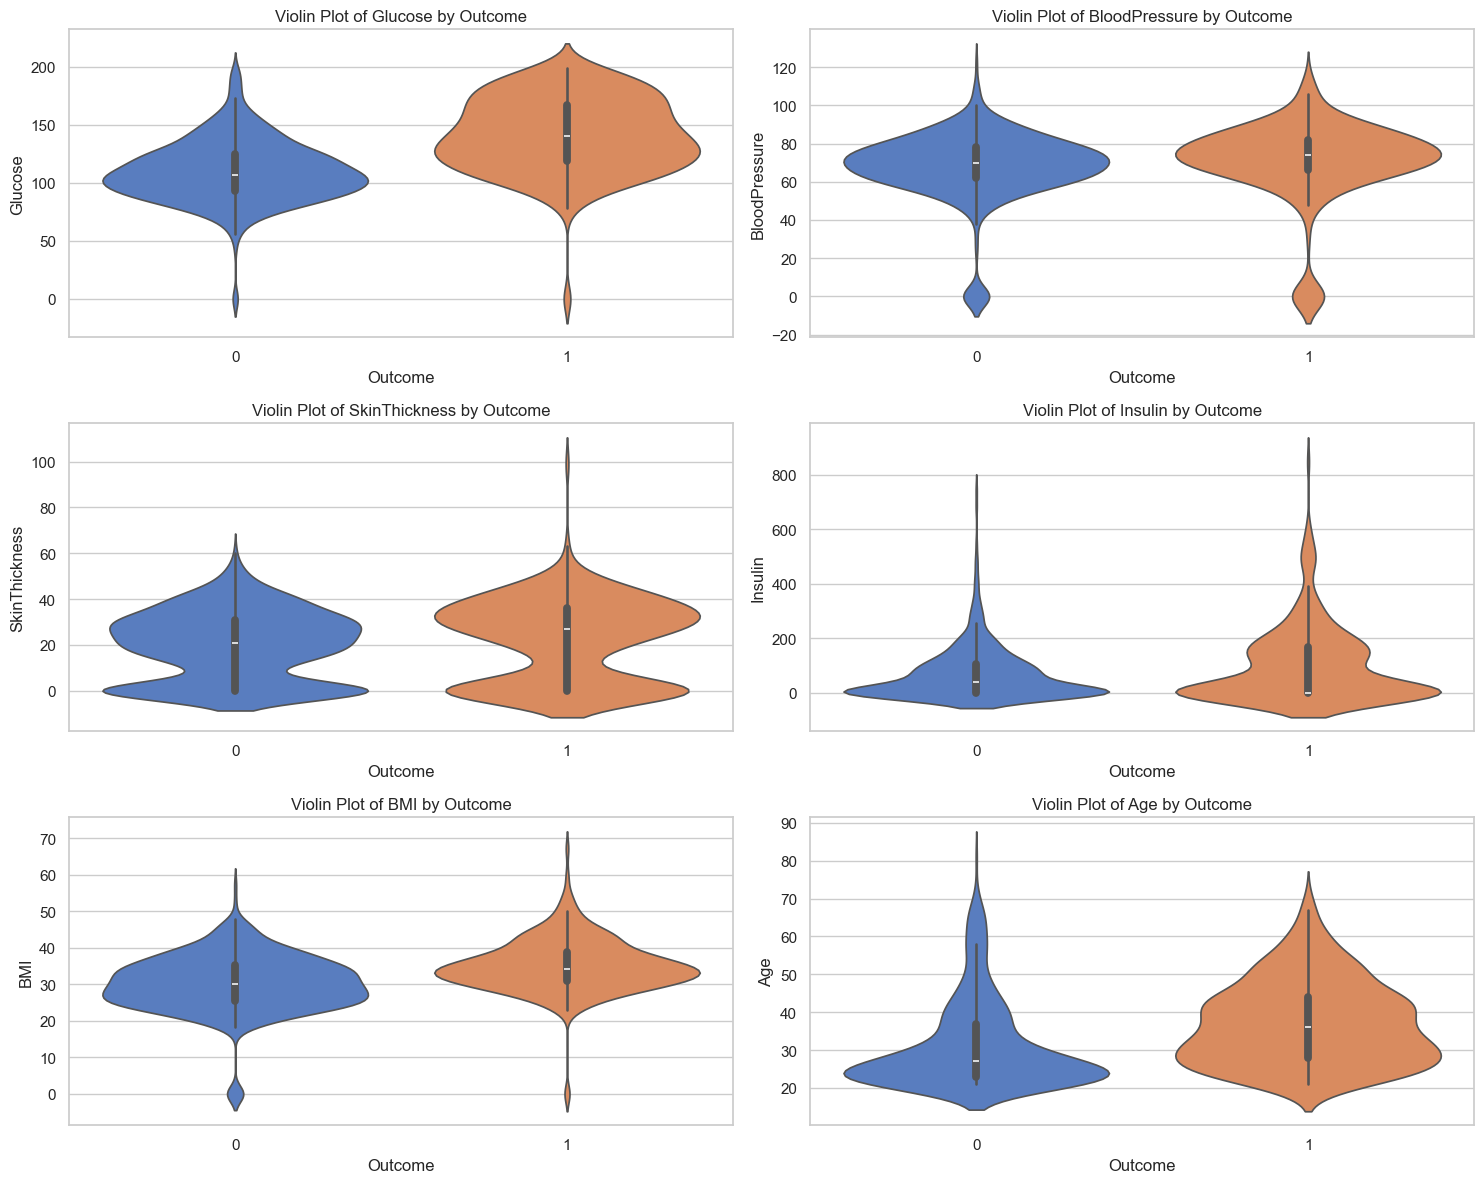

In [35]:
plt.figure(figsize=(15, 12))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 2, i)
    sns.violinplot(x='Outcome', y=feature, data=df, palette='muted')
    plt.title(f'Violin Plot of {feature} by Outcome')
    plt.xlabel('Outcome')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

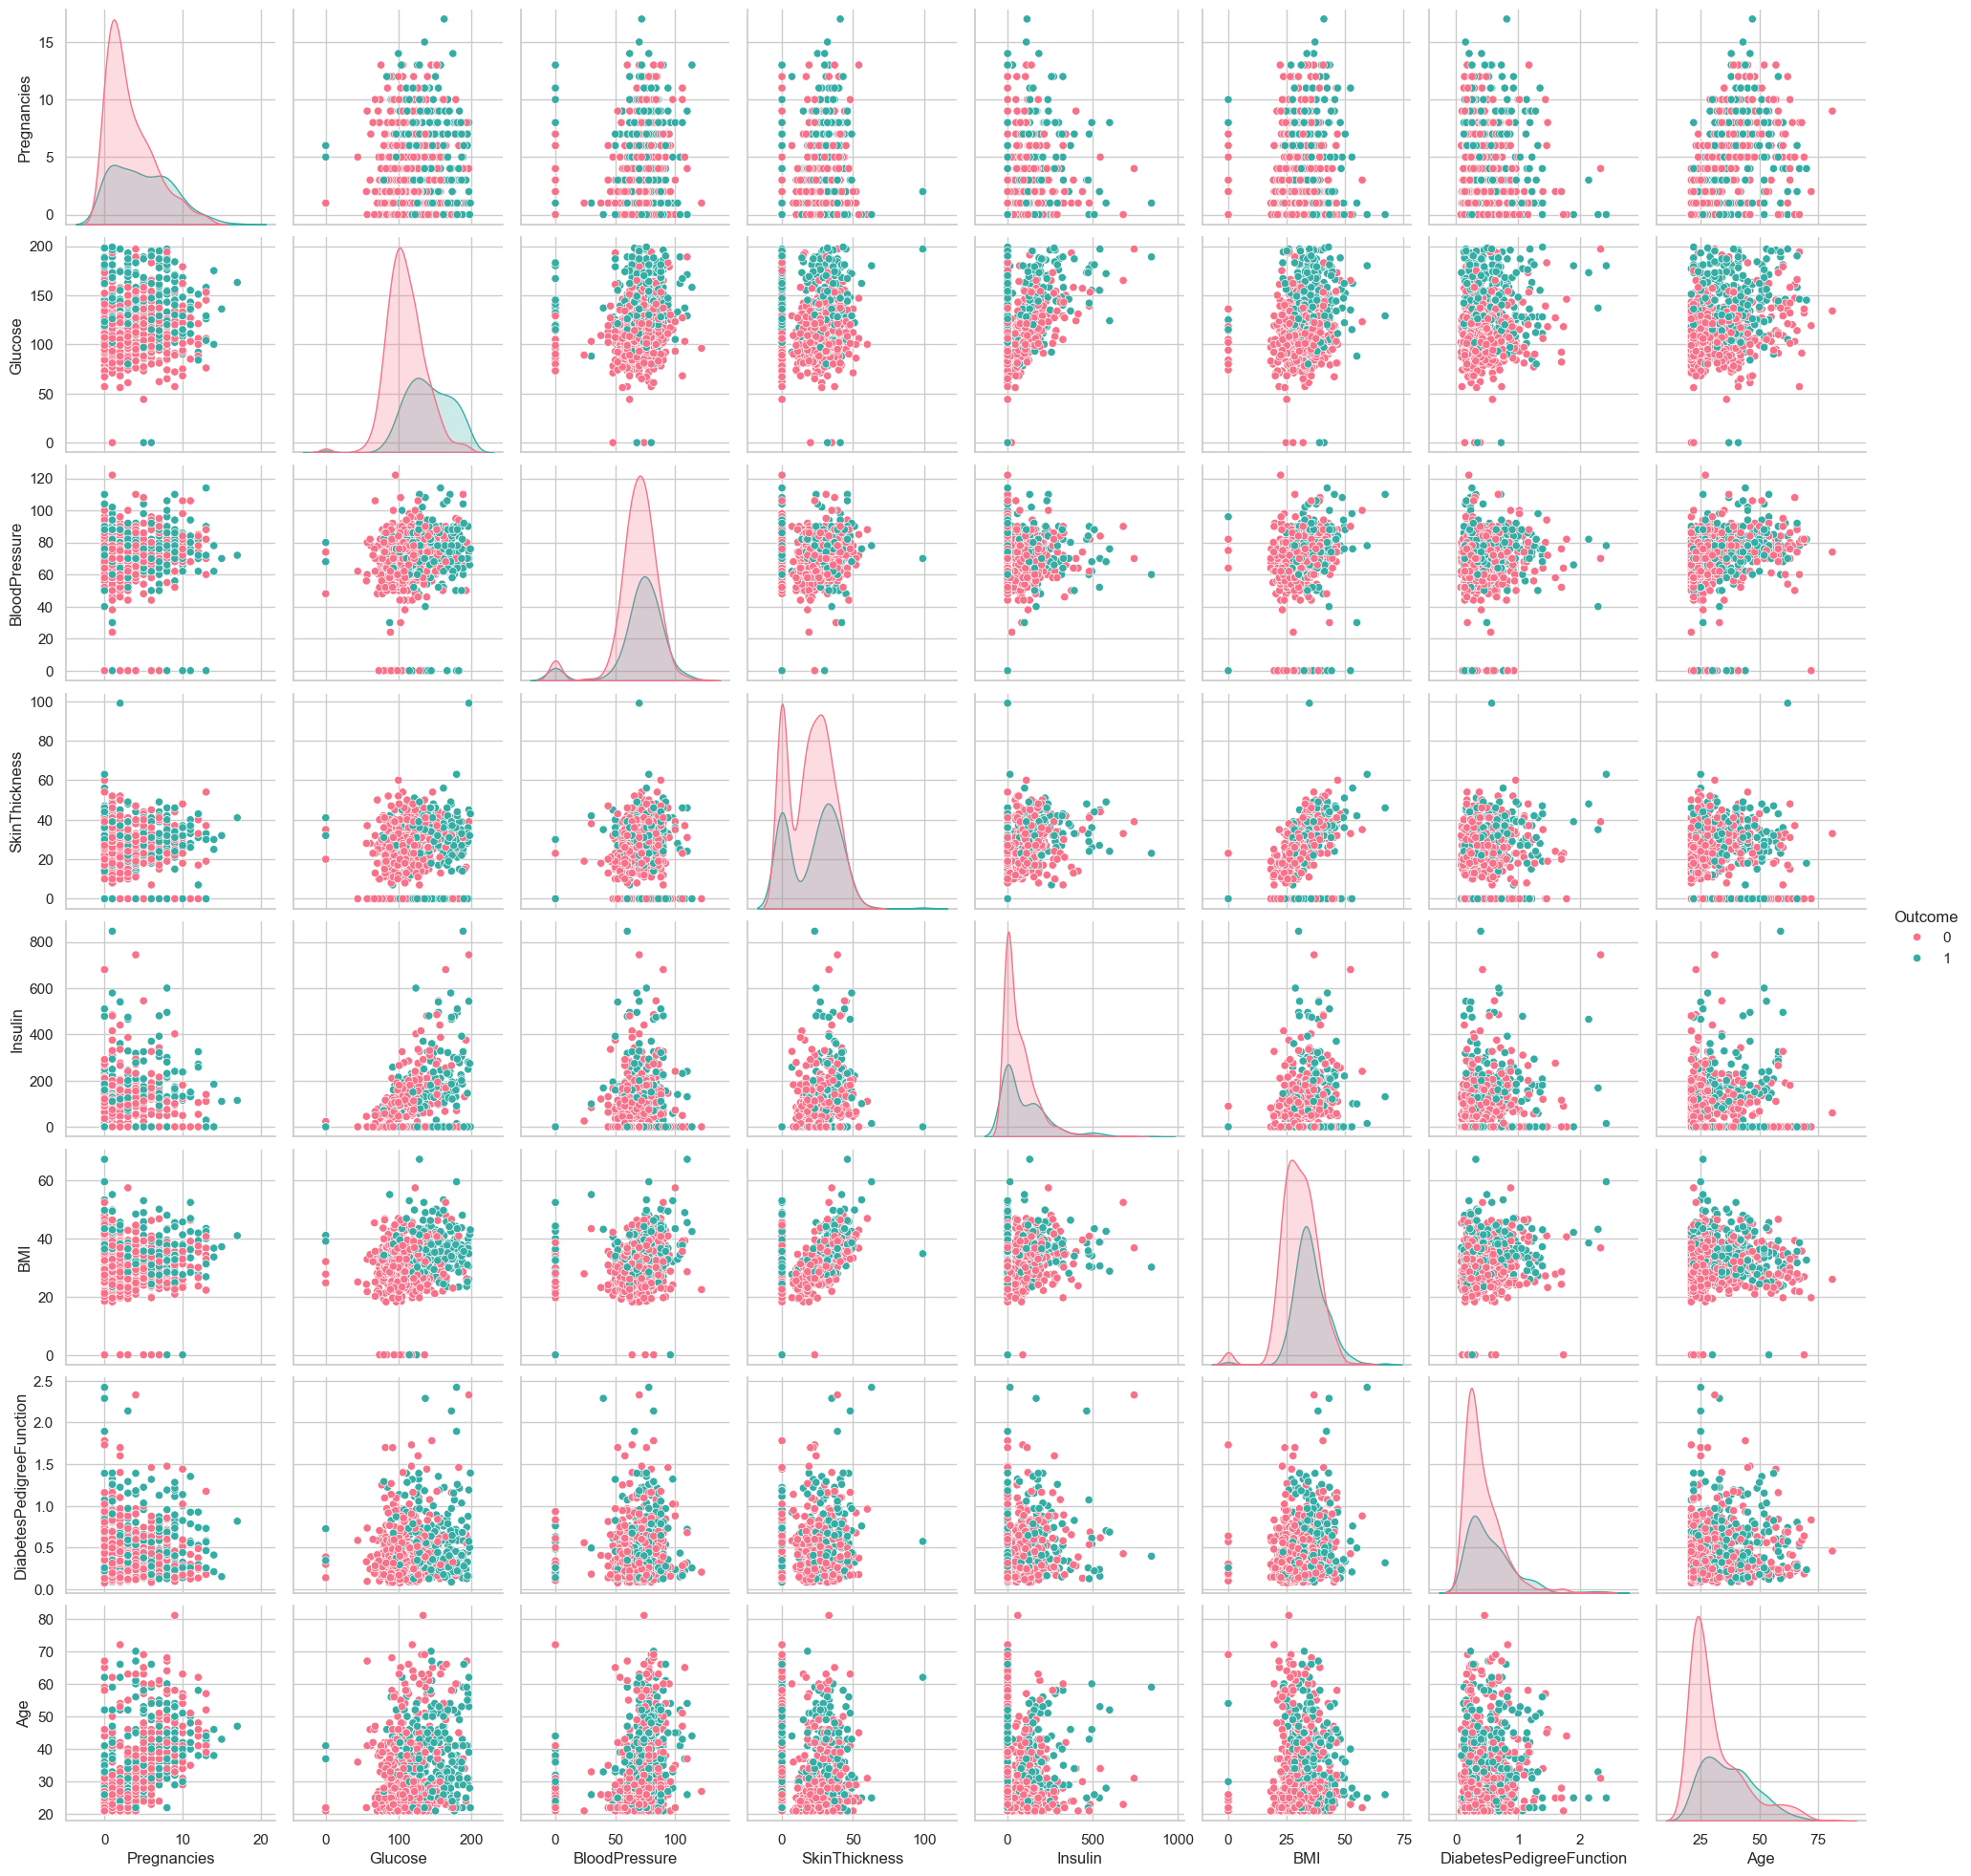

In [18]:
sns.pairplot(df, hue='Outcome', diag_kind='kde', palette='husl')
plt.show()

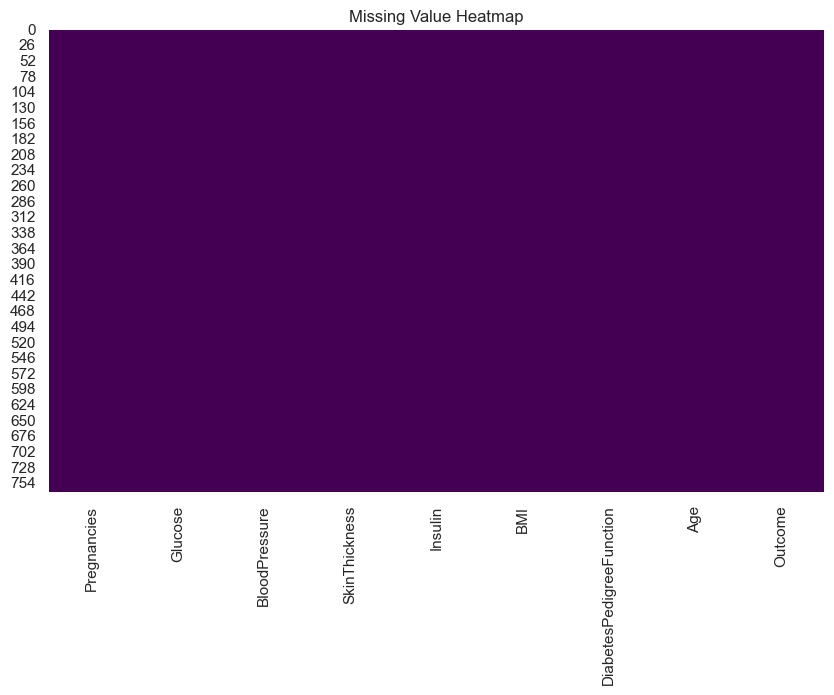

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

Step 4: Data Exploration and Preprocessing

In [20]:
# Check for missing values in each column
print("Missing Values:\n", df.isnull().sum())

# Display a summary of statistics for each numeric column
print("\nDataset Description:\n", df.describe())

# Display the column names and their data types
print("\nDataset Info:")
print(df.info())

# Check for class imbalance in the Outcome column
print("\nOutcome Value Counts:")
print(df['Outcome'].value_counts())

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Dataset Description:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000

Step 5: Splitting the Dataset

In [21]:
# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']               # Target

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the splits
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (614, 8)
Testing Features Shape: (154, 8)
Training Target Shape: (614,)
Testing Target Shape: (154,)


Step 6: Training the Random Forest Model

In [23]:
# Initialize the Random Forest model with default parameters
rf_model = RandomForestClassifier(random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Step 7: Evaluating the Random Forest Model

In [24]:
# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



Model Performance Visualizations

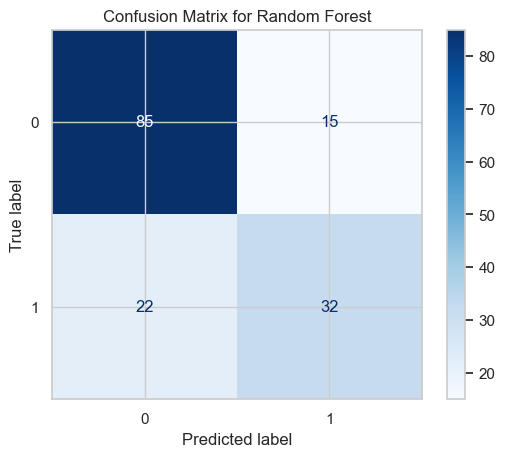

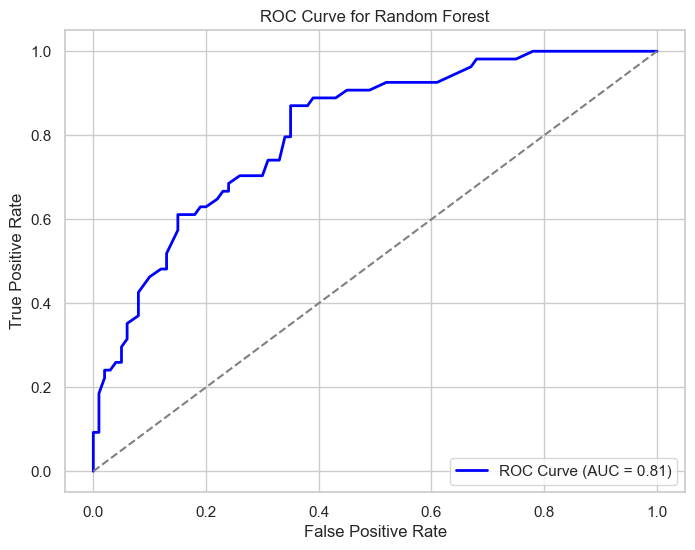

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Generate predictions for the test data
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

Using LazyPredict to Compare Models

In [31]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [32]:
# Import LazyClassifier
from lazypredict.Supervised import LazyClassifier

# Initialize the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate multiple models
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Display the results
print(models)

100%|██████████| 32/32 [00:00<00:00, 42.23it/s]

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

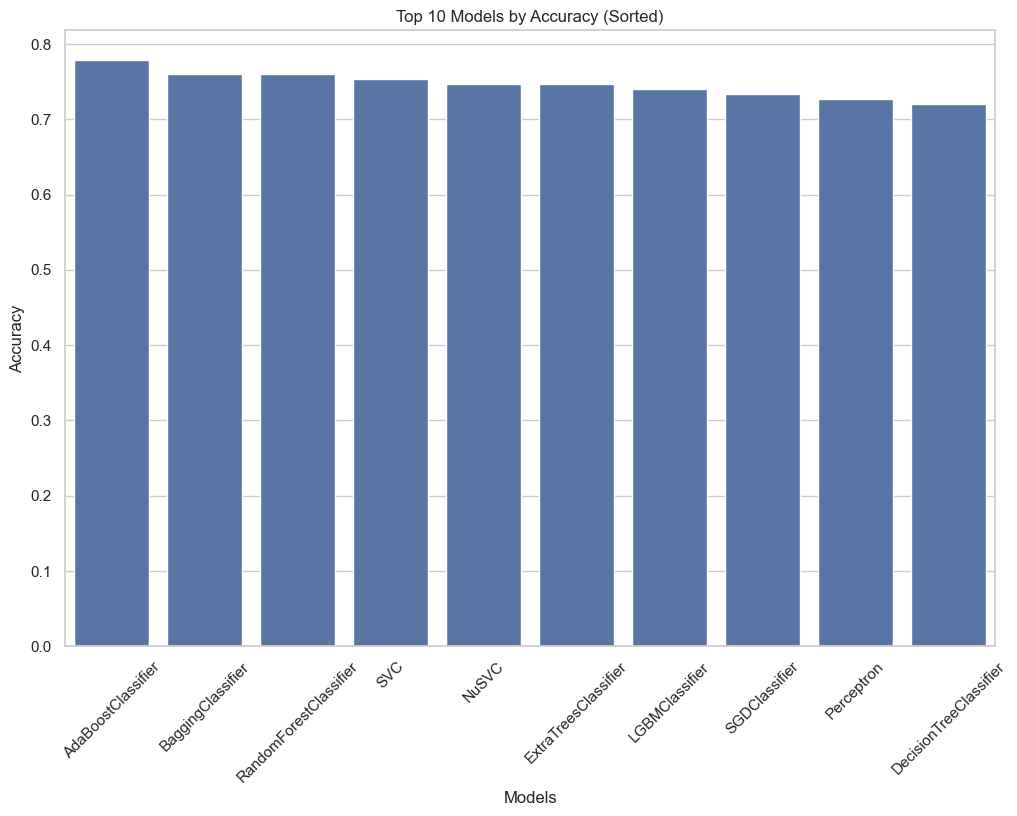

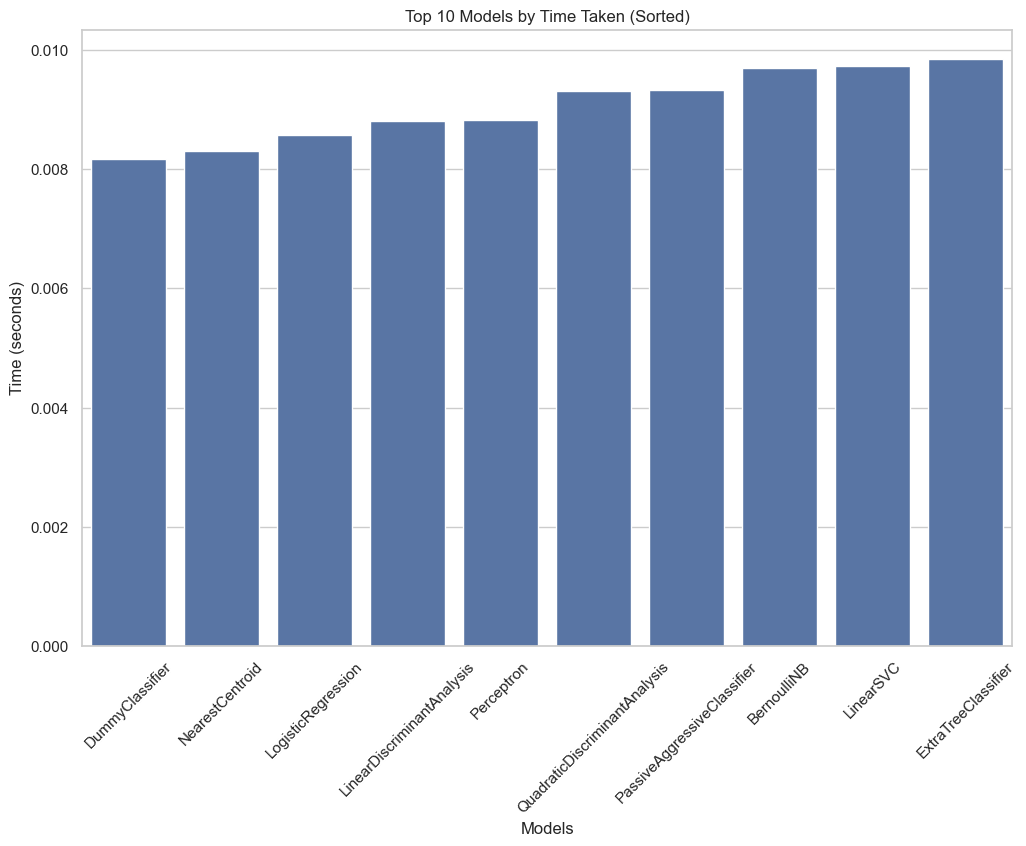

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort models by accuracy (descending)
models_sorted_accuracy = models.sort_values(by='Accuracy', ascending=False).head(10)

# Plot Accuracy of Top 10 Models (sorted)
plt.figure(figsize=(12, 8))
sns.barplot(x=models_sorted_accuracy.index, y=models_sorted_accuracy['Accuracy'])
plt.xticks(rotation=45)
plt.title('Top 10 Models by Accuracy (Sorted)')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

# Sort models by time taken (ascending)
models_sorted_time = models.sort_values(by='Time Taken', ascending=True).head(10)

# Plot Time Taken for Top 10 Models (sorted)
plt.figure(figsize=(12, 8))
sns.barplot(x=models_sorted_time.index, y=models_sorted_time['Time Taken'])
plt.xticks(rotation=45)
plt.title('Top 10 Models by Time Taken (Sorted)')
plt.xlabel('Models')
plt.ylabel('Time (seconds)')
plt.show()